In [40]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar

In [42]:
df = pd.read_excel("DataMDNonTidalDischargeBWDB137ATSVALUE_UPDATEDmax, minMonthlyFull.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [43]:
df = df.sort_values(by = ["YEAR","MONTH"])

In [53]:
monthly = df.groupby("MONTH").agg({'MAXOFTSVALUE_UPDATED': 'max',
                                                   'MINOFTSVALUE_UPDATED': 'mean'
                                                   })

In [54]:
monthly = monthly.reset_index()
monthly['MONTH'] = monthly['MONTH'].apply(lambda x: calendar.month_abbr[x])


In [55]:
monthly.columns = ["Month", "Maximum","Minimum"]

In [56]:
month_order = ["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]
monthly = monthly.set_index(monthly["Month"]).loc[month_order]

In [57]:
df.describe()

,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED
count,394.000000,394.000000,394.000000,394.000000
mean,1983.517766,6.497462,898.666168,439.472335
std,12.500623,3.459874,986.676061,594.957139
min,1964.000000,1.000000,6.420000,1.490000
25%,1973.000000,4.000000,61.075000,19.372500
50%,1983.000000,6.500000,555.000000,136.000000
75%,1991.750000,9.000000,1467.500000,646.500000
max,2007.000000,12.000000,5350.000000,2460.000000


In [58]:
df.nlargest(1,["MAXOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED
238,137A,1973,8,5350.0,2450.0


In [59]:
df.nsmallest(1,["MINOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED
389,137A,2004,3,7.09,1.49


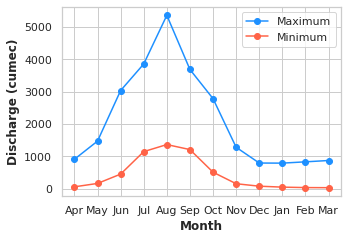

In [60]:

sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax = plt.plot(monthly["Maximum"], color = 'dodgerblue',marker = 'o', label = "Maximum")
ax = plt.plot(monthly["Minimum"], color = 'tomato',marker = 'o', label = "Minimum")
plt.legend()
# plt.yticks(np.arange(0,16,1))

plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Discharge (cumec)", fontweight="semibold")
plt.tight_layout()
plt.savefig("137A_Q.jpg", dpi = 500)
plt.show()

In [61]:
monthly.to_excel("137A_Q_monthly.xlsx")